In [1]:
import torch
from torch import nn
from input.reading_datasets import *
from input.time_series_module import TimeSeriesDataset
import os
from utils_file import *
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
# import os
# import zipfile

# def unzip_file(zip_path):
#     """
#     Unzips the given zip file and saves the extracted files in a folder named
#     after the zip file (without the extension) in the same directory.

#     Parameters:
#         zip_path (str): Path to the zip file.
#     """
#     # Ensure the file exists
#     if not os.path.isfile(zip_path):
#         print(f"Error: File '{zip_path}' does not exist.")
#         return

#     # Get the folder name by removing the extension from the zip file name
#     folder_name = os.path.splitext(os.path.basename(zip_path))[0]
#     folder_path = os.path.join(os.path.dirname(zip_path), folder_name)

#     # Create the folder if it doesn't exist
#     os.makedirs(folder_path, exist_ok=True)

#     # Extract the zip file
#     try:
#         with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#             zip_ref.extractall(folder_path)
#         print(f"Files extracted to: {folder_path}")
#     except zipfile.BadZipFile:
#         print(f"Error: '{zip_path}' is not a valid zip file.")


# unzip_file(zip_path = '/home/stbastos/experiments/health_tests/multimodal_tsc_study_cases/downloaded_datasets/wear-inertial-1s-50hz.zip')

In [3]:
torch.cuda.is_available()

True

In [4]:
# all_datasets = get_all_datasets(read_from_path=True)

In [5]:
complete_data = get_all_results(False)
# complete_data.query("dataset == 'standwalkjump'")

In [6]:
max_exec = complete_data.groupby(['model_name', 'dataset']).agg({
    'seed': max
}).reset_index()

# max_exec.loc[max_exec.model_name.apply(lambda x: True if 'LITE' in x else False)]
max_exec

,model_name,dataset,seed
0,FullyConvolutionalNetwork1DGAP,daily_and_sports_activities,10
1,FullyConvolutionalNetwork1DGAP,wear_inertial,10
2,FullyConvolutionalNetwork1DIntermediateGAP,daily_and_sports_activities,10
3,FullyConvolutionalNetwork1DIntermediateGAP,wear_inertial,4
4,FullyConvolutionalNetwork1DLateGAP,daily_and_sports_activities,10
5,FullyConvolutionalNetwork1DLateGAP,wear_inertial,4
6,InceptionTime,daily_and_sports_activities,10
7,InceptionTime,wear_inertial,1
8,InceptionTimeIntermediate,daily_and_sports_activities,1
9,LITE,daily_and_sports_activities,10


In [7]:
agg_results_data = get_all_results(True)

In [8]:
agg_results_data.model_name.unique()

array(['FullyConvolutionalNetwork1DGAP',
       'FullyConvolutionalNetwork1DIntermediateGAP',
       'FullyConvolutionalNetwork1DLateGAP', 'InceptionTime',
       'InceptionTimeIntermediate', 'LITE', 'LITEIntermediate'],
      dtype=object)

/tmp/ipykernel_1878028/714134161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_data['Model Name'] = used_data.model_name.map({


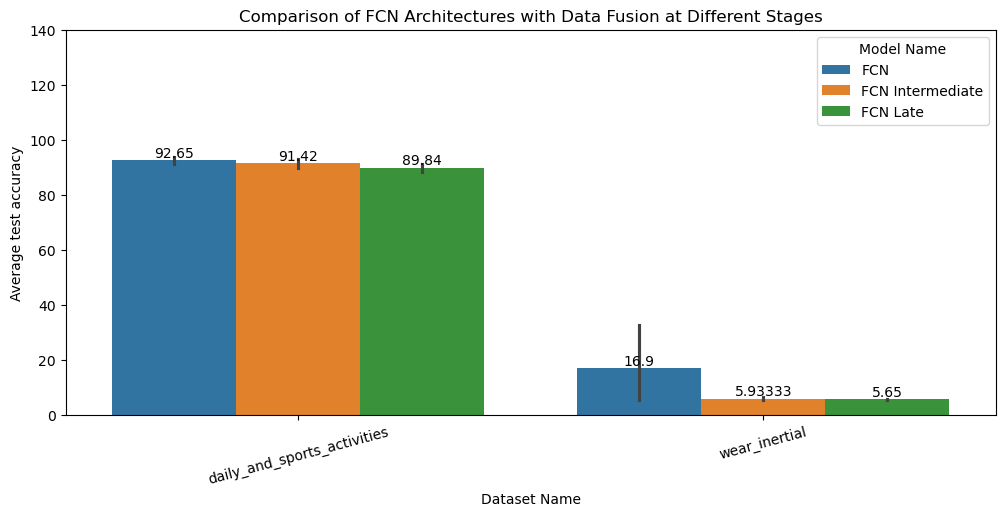

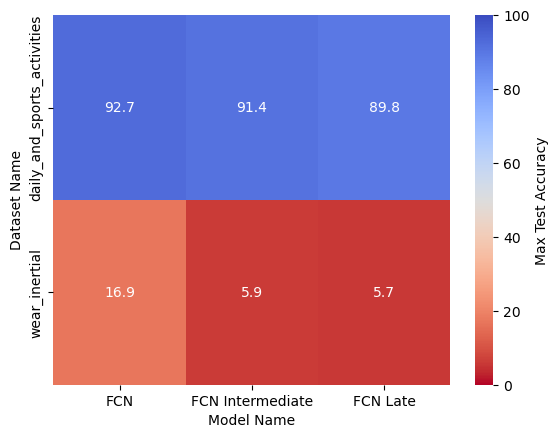

In [9]:
plt.figure(figsize = (12,5))
used_data = complete_data.loc[complete_data.model_name.isin(['FullyConvolutionalNetwork1DGAP','FullyConvolutionalNetwork1DIntermediateGAP', 'FullyConvolutionalNetwork1DLateGAP'])]
used_data['Model Name'] = used_data.model_name.map({
    'FullyConvolutionalNetwork1DLateGAP': 'FCN Late',
    'FullyConvolutionalNetwork1DIntermediateGAP': 'FCN Intermediate',
    'FullyConvolutionalNetwork1DGAP': 'FCN'
})


ax = sns.barplot(
    data = used_data.query("dataset != 'eigenworms'"), 
    x = 'dataset', 
    y = 100*used_data['max_test_accuracy'].apply(lambda x: round(x, 3)), 
    hue = 'Model Name'
)

for i in ax.containers:
    ax.bar_label(i,)

plt.xticks(rotation = 15)
# plt.xlim([0, 100*1.6])
plt.ylim([0, 140])
plt.xlabel('Dataset Name')
plt.ylabel('Average test accuracy')
plt.title("Comparison of FCN Architectures with Data Fusion at Different Stages")
plt.show();

heatmap_data = used_data[['dataset', 'Model Name', 'max_test_accuracy']].groupby(['dataset', 'Model Name']).mean().reset_index().query("dataset != 'eigenworms'").pivot(columns = 'Model Name', index = 'dataset', values = 'max_test_accuracy')
heatmap_data

ax = sns.heatmap((heatmap_data*100).round(1), annot=True, cmap='coolwarm_r', fmt='.1f', cbar_kws={'label': 'Max Test Accuracy'}, vmin=0, vmax=100)
plt.ylabel('Dataset Name')
# plt.title("Comparison of FCN Architectures with Data Fusion at Different Stages")
plt.show();




/tmp/ipykernel_1878028/1077655842.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_data['Model Name'] = used_data.model_name.map({


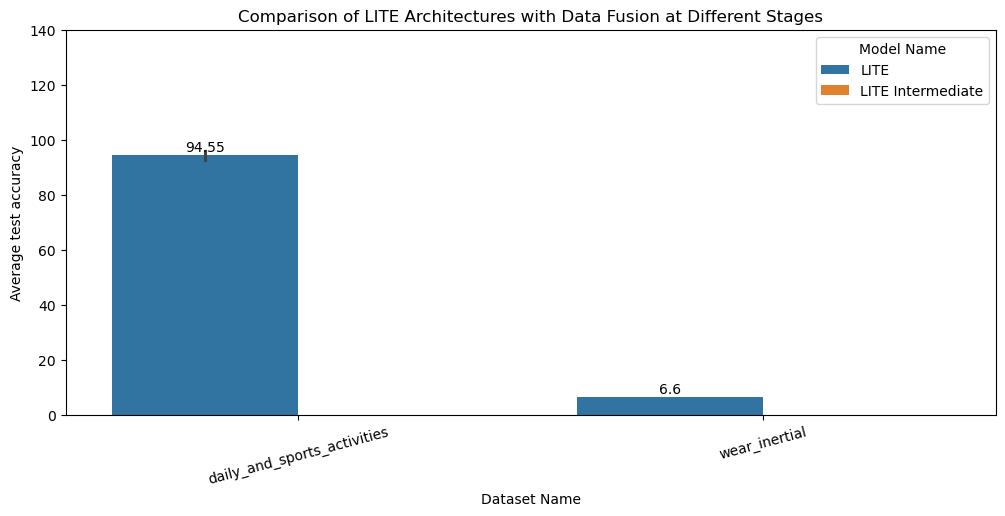

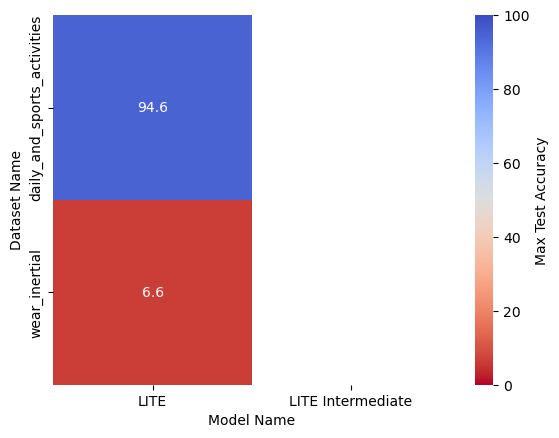

In [10]:
plt.figure(figsize = (12,5))
used_data = complete_data.loc[complete_data.model_name.isin(['LITE', 'LITEIntermediate', 'LITELate'])]
used_data['Model Name'] = used_data.model_name.map({
    'LITELate': 'LITE Late',
    'LITEIntermediate': 'LITE Intermediate',
    'LITE': 'LITE'
})


ax = sns.barplot(
    data = used_data.query("dataset != 'eigenworms'"), 
    x = 'dataset', 
    y = 100*used_data['max_test_accuracy'].apply(lambda x: round(x, 3)), 
    hue = 'Model Name'
)

for i in ax.containers:
    ax.bar_label(i,)

plt.xticks(rotation = 15)
# plt.xlim([0, 100*1.6])
plt.ylim([0, 140])
plt.xlabel('Dataset Name')
plt.ylabel('Average test accuracy')
plt.title("Comparison of LITE Architectures with Data Fusion at Different Stages")

plt.show();

heatmap_data = used_data[['dataset', 'Model Name', 'max_test_accuracy']].groupby(['dataset', 'Model Name']).mean().reset_index().query("dataset != 'eigenworms'").pivot(columns = 'Model Name', index = 'dataset', values = 'max_test_accuracy')
heatmap_data

ax = sns.heatmap((heatmap_data*100).round(1), annot=True, cmap='coolwarm_r', fmt='.1f', cbar_kws={'label': 'Max Test Accuracy'}, vmin=0, vmax=100)
plt.ylabel('Dataset Name')
# plt.title("Comparison of FCN Architectures with Data Fusion at Different Stages")
plt.show();


/tmp/ipykernel_1878028/4248278841.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_data['Model Name'] = used_data.model_name.map({


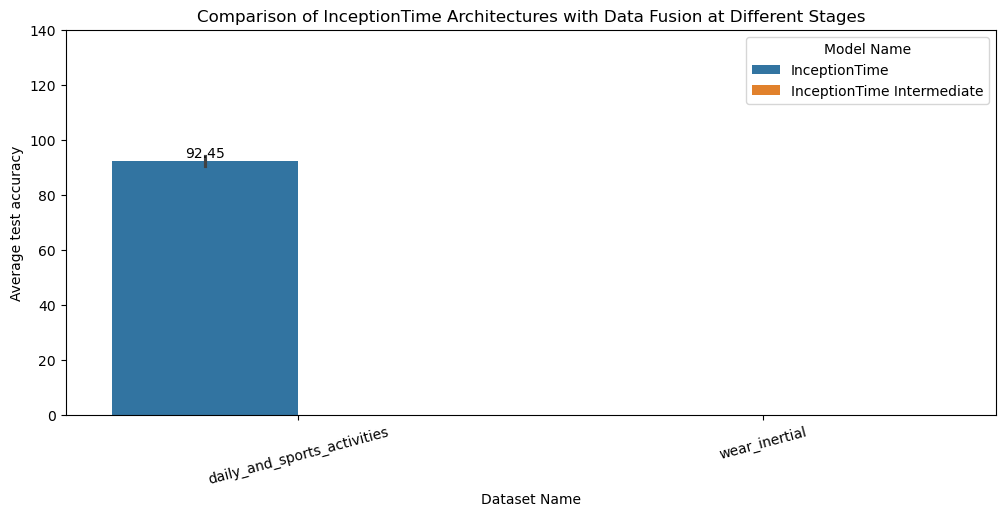

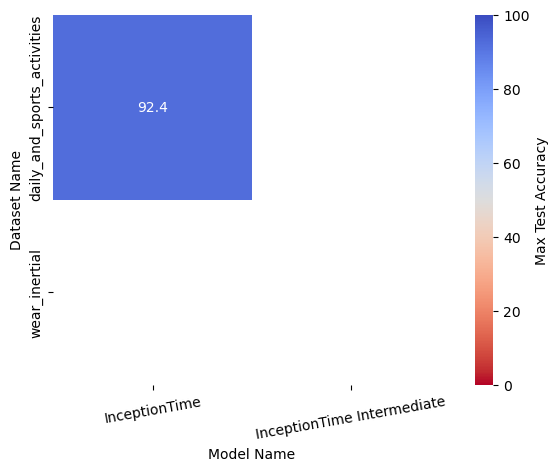

In [11]:
plt.figure(figsize = (12,5))
used_data = complete_data.loc[complete_data.model_name.isin(['InceptionTime', 'InceptionTimeIntermediate', 'InceptionTimeLate'])]
used_data['Model Name'] = used_data.model_name.map({
    'InceptionTimeLate': 'InceptionTime Late',
    'InceptionTimeIntermediate': 'InceptionTime Intermediate',
    'InceptionTime': 'InceptionTime'
})


ax = sns.barplot(
    data = used_data.query("dataset != 'eigenworms'"), 
    x = 'dataset', 
    y = 100*used_data['max_test_accuracy'].apply(lambda x: round(x, 3)), 
    hue = 'Model Name'
)

for i in ax.containers:
    ax.bar_label(i,)

plt.xticks(rotation = 15)
# plt.xlim([0, 100*1.6])
plt.ylim([0, 140])
plt.xlabel('Dataset Name')
plt.ylabel('Average test accuracy')
plt.title("Comparison of InceptionTime Architectures with Data Fusion at Different Stages")

plt.show();

heatmap_data = used_data[['dataset', 'Model Name', 'max_test_accuracy']].groupby(['dataset', 'Model Name']).mean().reset_index().query("dataset != 'eigenworms'").pivot(columns = 'Model Name', index = 'dataset', values = 'max_test_accuracy')
heatmap_data

ax = sns.heatmap((heatmap_data*100).round(1), annot=True, cmap='coolwarm_r', fmt='.1f', cbar_kws={'label': 'Max Test Accuracy'}, vmin=0, vmax=100)
plt.ylabel('Dataset Name')
plt.xticks(rotation = 10)
# plt.title("Comparison of FCN Architectures with Data Fusion at Different Stages")
plt.show();


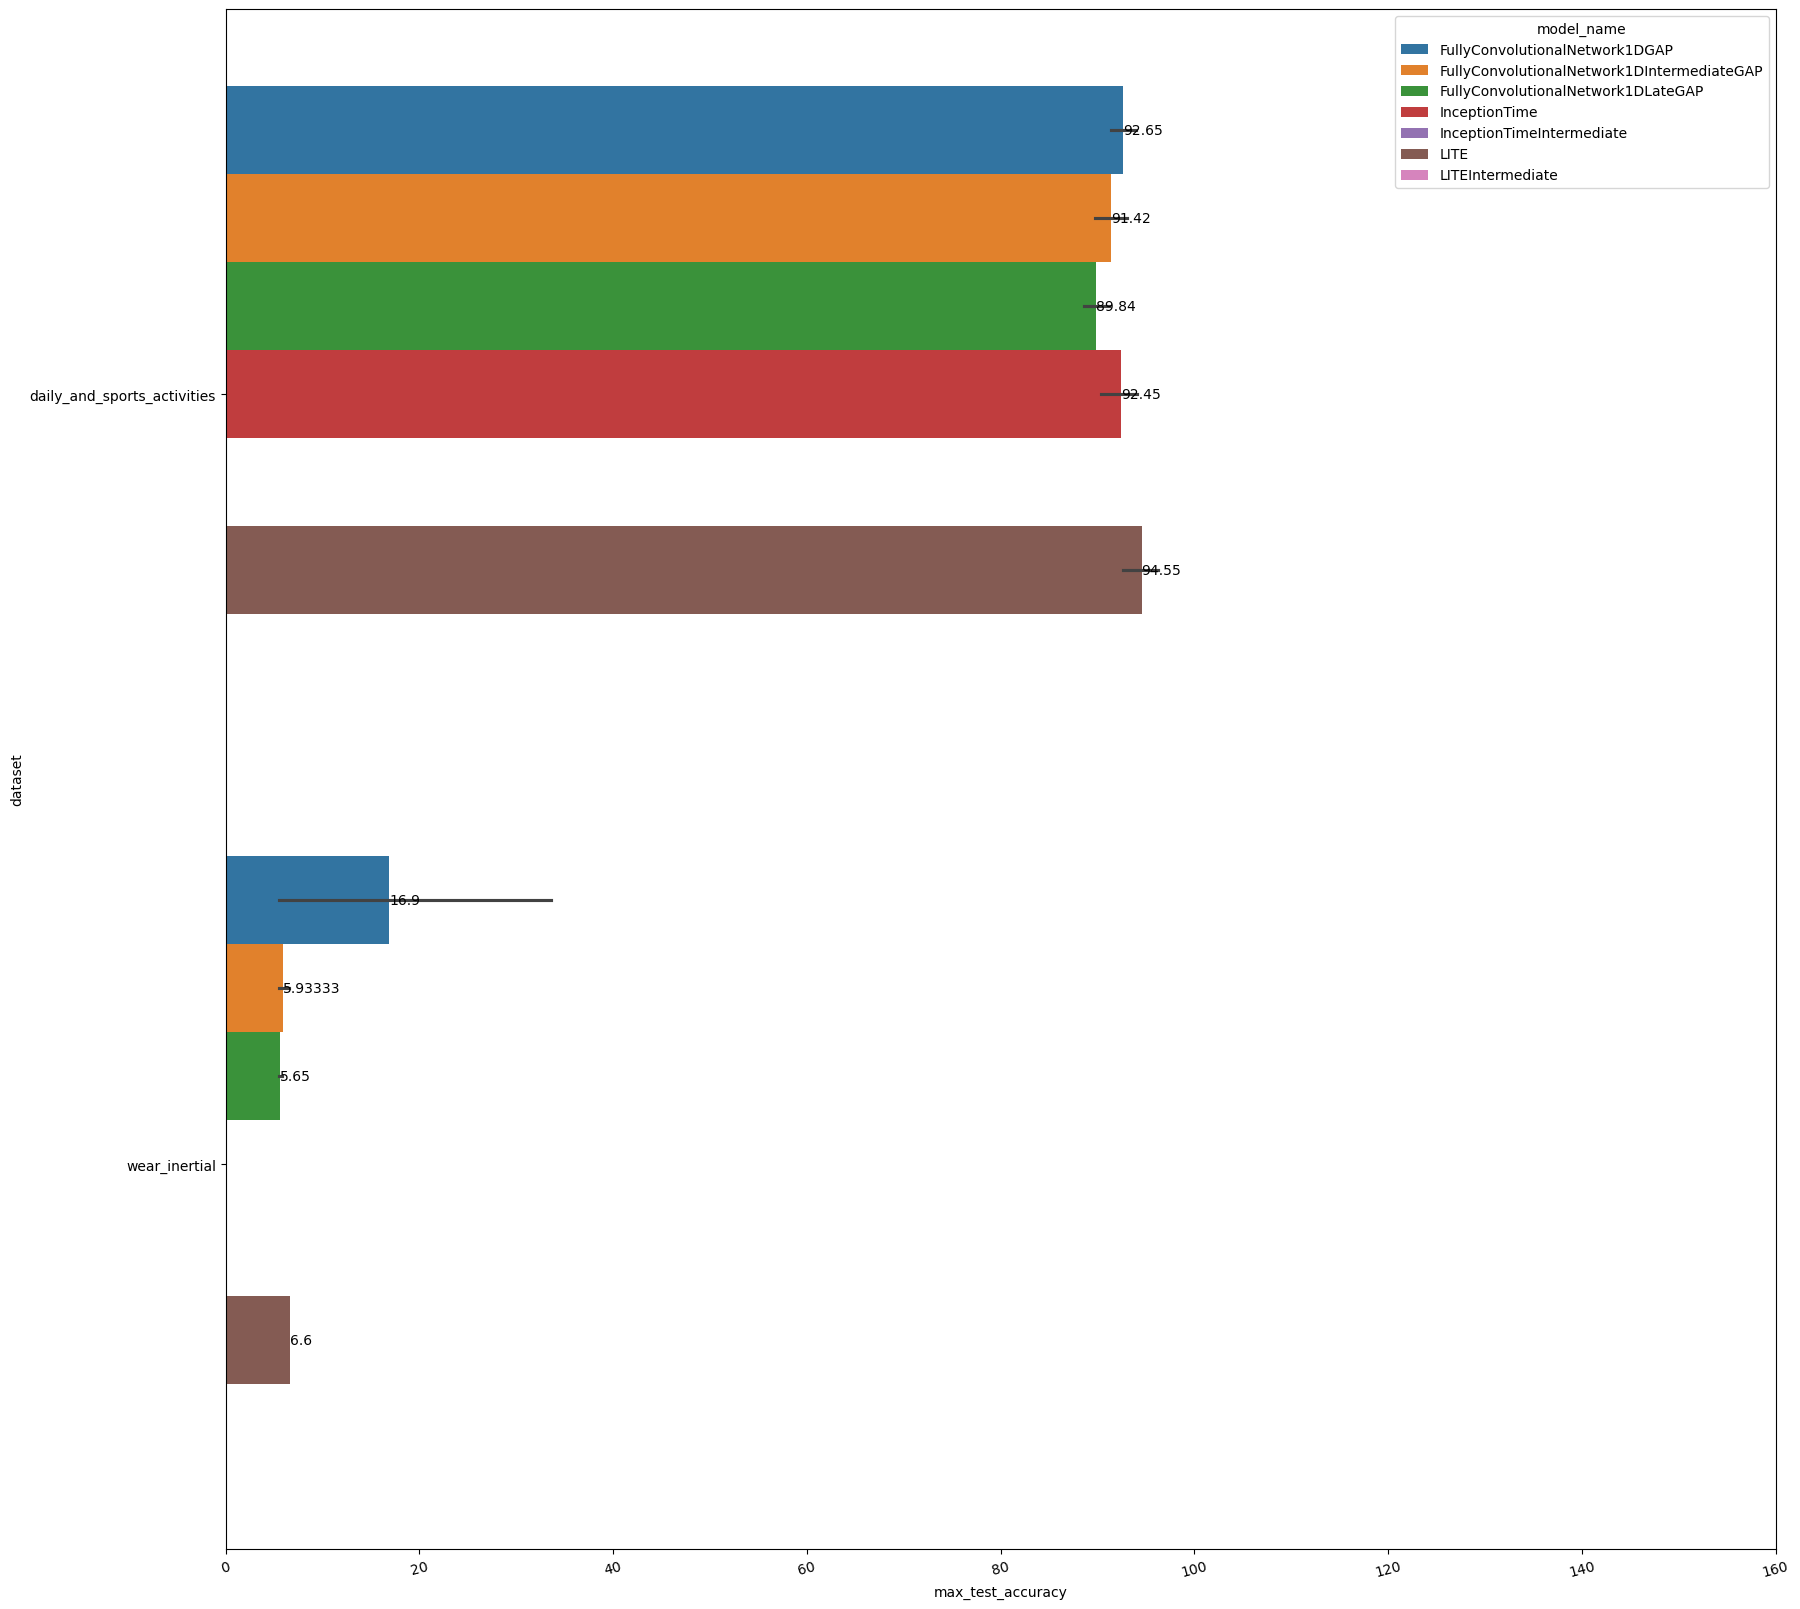

In [12]:
plt.figure(figsize = (20,20))
used_data = complete_data.loc[~complete_data.model_name.isin(['FullyConvolutionalNetwork1DLate','FullyConvolutionalNetwork1DIntermediate', 'FullyConvolutionalNetwork1D'])]

ax = sns.barplot(
    data = used_data, 
    y = 'dataset', 
    x = 100*used_data['max_test_accuracy'].apply(lambda x: round(x, 3)), 
    hue = 'model_name'
)

for i in ax.containers:
    ax.bar_label(i,)

plt.xticks(rotation = 15)
plt.xlim([0, 100*1.6])
plt.show()

/tmp/ipykernel_1878028/646229928.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_data['model_name'] = used_data['model_name'].apply(rename_model)


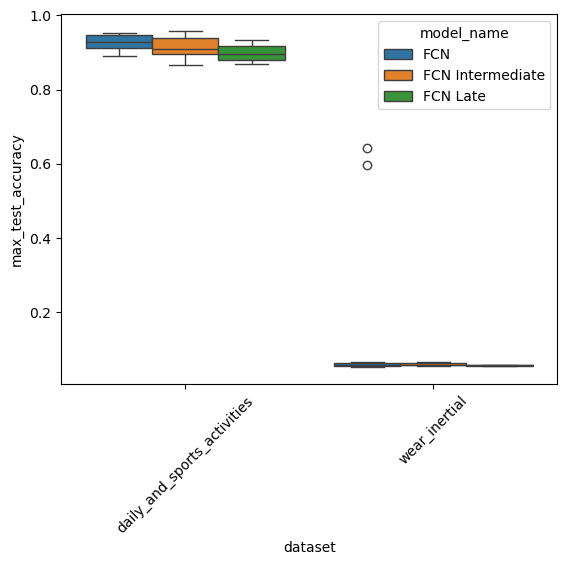

In [13]:
def rename_model(x):
    model_name_map = {
        'FullyConvolutionalNetwork1DLateGAP': 'FCN Late',
        'FullyConvolutionalNetwork1DIntermediateGAP': 'FCN Intermediate',
        'FullyConvolutionalNetwork1DGAP': 'FCN'
    }
    return model_name_map[x] if x in model_name_map.keys() else x

used_data = complete_data.loc[complete_data.model_name.isin(['FullyConvolutionalNetwork1DLateGAP','FullyConvolutionalNetwork1DIntermediateGAP', 'FullyConvolutionalNetwork1DGAP'])]
used_data['model_name'] = used_data['model_name'].apply(rename_model)
used_data = used_data.query("dataset != 'eigenworms'")

sns.boxplot(data=used_data, x = 'dataset', y = 'max_test_accuracy', hue = 'model_name')
plt.xticks(rotation = 45)
plt.show()

/tmp/ipykernel_1878028/260923247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_data['model_name'] = used_data['model_name'].apply(rename_model)


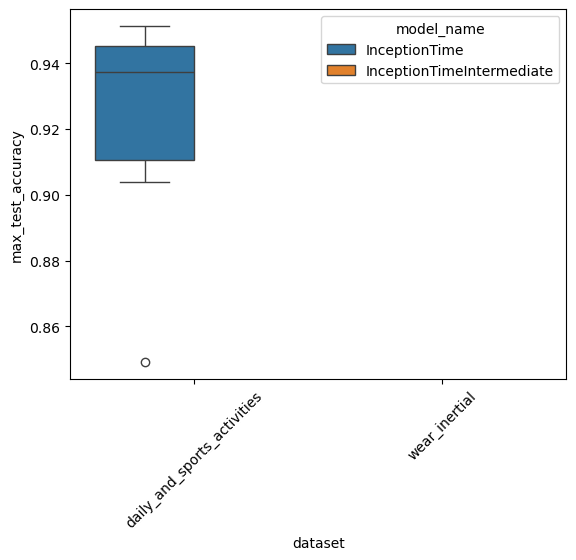

In [ ]:
used_data = complete_data.loc[complete_data.model_name.isin(['InceptionTime','InceptionTimeIntermediate', 'InceptionTimeLate'])]
used_data['model_name'] = used_data['model_name'].apply(rename_model)
used_data = used_data.query("dataset != 'eigenworms'")

sns.boxplot(data=used_data, x = 'dataset', y = 'max_test_accuracy', hue = 'model_name')
plt.xticks(rotation = 45)
plt.show()

In [15]:
used_data.query("dataset == 'coffee'")

,directory,model_name,dataset,seed,max_train_accuracy,max_test_accuracy,epochs,execution_time,time_per_epoch


/tmp/ipykernel_1878028/3780849816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_data['model_name'] = used_data['model_name'].apply(rename_model)


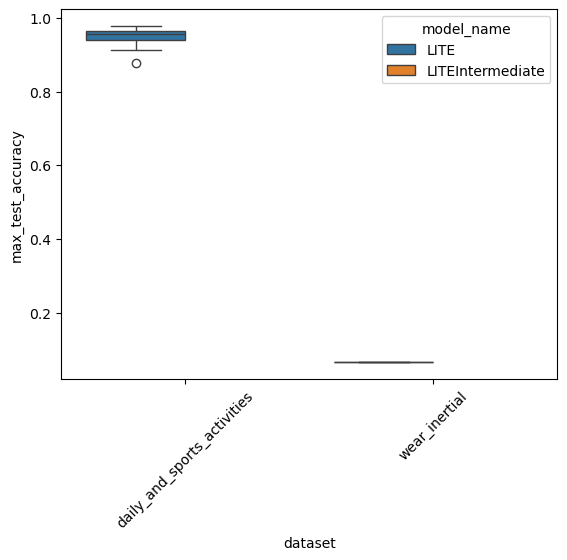

In [ ]:
used_data = complete_data.loc[complete_data.model_name.isin(['LITE','LITEIntermediate', 'LITELate'])]
used_data['model_name'] = used_data['model_name'].apply(rename_model)
used_data = used_data.query("dataset != 'eigenworms'")

sns.boxplot(data=used_data, x = 'dataset', y = 'max_test_accuracy', hue = 'model_name')
plt.xticks(rotation = 45)
plt.show()

In [17]:
def read_metrics(path):
    file = open(path, 'rb')
    metrics = pickle.load(file)

    return metrics

metrics = read_metrics('/home/stbastos/experiments/multimodal_time_series_classification/model_checkpoints/FullyConvolutionalNetwork1D_articularywordrecognition_1/metrics.pkl')

not_ensemble_models = [
    'FullyConvolutionalNetwork1DGAP',
    'FullyConvolutionalNetwork1DLateGAP',
    'FullyConvolutionalNetwork1DIntermediateGAP',
    'FullyConvolutionalNetwork1D',
    'FullyConvolutionalNetwork1DLate',
    'FullyConvolutionalNetwork1DIntermediate',
    'MultiLayerPerceptron'
]

model_checkpoints_path = '/home/stbastos/experiments/multimodal_time_series_classification/model_checkpoints'


model_execution_info = []


for execution in os.listdir(model_checkpoints_path):

    
    model_name, dataset_name, execution_number = execution.split('_')
    if dataset_name == 'eigenworms':
        continue

    if model_name in not_ensemble_models:
        seed = execution_number
        model_path = model_checkpoints_path + '/' + execution + '/metrics.pkl'
        metrics = read_metrics(model_path)
        max_test_accuracy = max(metrics['history']['test_accuracy'])

        model_info = {
            'model_name': model_name,
            'dataset_name': dataset_name,
            'execution_number': execution_number,
            'seed': seed,
            'traning_time': metrics['traning_time'],
            'total_epochs': len(metrics['history']['epochs']),
            'test_accuracy': max_test_accuracy,
            'epochs_to_get_maximum': metrics['history']['test_accuracy'].index(max_test_accuracy) + 1
        }

        model_execution_info.append(model_info)

    else:
        for execution_ensemble in os.listdir(model_checkpoints_path + '/' + execution):
            if execution_ensemble == 'metrics.pkl':
                continue
            else:
                seed = execution_ensemble.split('model')[-1]
                model_path = model_checkpoints_path + '/' + execution + '/' + execution_ensemble + '/metrics.pkl'
                metrics = read_metrics(model_path)

                max_test_accuracy = max(metrics['history']['test_accuracy'])

                model_info = {
                    'model_name': model_name,
                    'dataset_name': dataset_name,
                    'execution_number': execution_number,
                    'seed': seed,
                    'traning_time': metrics['traning_time'],
                    'total_epochs': len(metrics['history']['epochs']),
                    'test_accuracy': max_test_accuracy,
                    'epochs_to_get_maximum': metrics['history']['test_accuracy'].index(max_test_accuracy) + 1
                }

                model_execution_info.append(model_info)

model_execution_info = pd.DataFrame(model_execution_info)  
model_execution_info['execution_number'] = pd.to_numeric(model_execution_info['execution_number'])
model_execution_info['seed'] = pd.to_numeric(model_execution_info['seed'])
model_execution_info['time_per_epoch'] = model_execution_info['total_epochs']/model_execution_info['traning_time']
model_execution_info['is_multimodal'] = model_execution_info.model_name.apply(lambda x: 'Mutlimodal' if ('Intermediate' in x ) or ('Late' in x) else 'Not Multimodal')
model_execution_info['is_ensemble'] = model_execution_info.model_name.apply(lambda x: 'Ensemble' if x not in not_ensemble_models else 'Not Ensemble')

In [18]:
agg_model_execution_info = model_execution_info.groupby(['model_name', 'dataset_name', 'execution_number', 'is_multimodal']).agg({
    'traning_time': 'sum',
    'test_accuracy': 'mean',
    'epochs_to_get_maximum': 'mean',
    'time_per_epoch': 'mean',
}).reset_index()

agg_model_execution_info = pd.merge(
    left=agg_model_execution_info,
    right=pd.read_csv('params_info.csv'),
    on = ['model_name', 'dataset_name'],
    how = 'left'
)

# params_info = pd.read_csv('params_info.csv')

In [19]:
agg_model_execution_info.dataset_name.unique()

array(['articularywordrecognition', 'atrialfibrillation', 'basicmotions',
       'cricket', 'natops', 'racketsports', 'standwalkjump'], dtype=object)

In [20]:
# params_comp_results = agg_model_execution_info.loc[agg_model_execution_info['model_name'].isin(['FullyConvolutionalNetwork1DGAP', 'FullyConvolutionalNetwork1DIntermediateGAP', 'FullyConvolutionalNetwork1DLateGAP'])]
# params_comp_results = params_comp_results.groupby(['model_name', 'dataset_name']).agg({
#     'model_params': 'mean',
#     'epochs_to_get_maximum': 'mean'
# }).reset_index()

In [21]:
agg_model_execution_info

,model_name,dataset_name,execution_number,is_multimodal,traning_time,test_accuracy,epochs_to_get_maximum,time_per_epoch,model_params
0,FullyConvolutionalNetwork1D,articularywordrecognition,1,Not Multimodal,2.277446,1.000000,33.0,2195.441476,NaN
1,FullyConvolutionalNetwork1D,articularywordrecognition,2,Not Multimodal,220.451716,0.991304,1176.0,22.680703,NaN
2,FullyConvolutionalNetwork1D,articularywordrecognition,3,Not Multimodal,0.389587,1.000000,6.0,12834.106261,NaN
3,FullyConvolutionalNetwork1D,articularywordrecognition,4,Not Multimodal,0.261074,1.000000,4.0,19151.653297,NaN
4,FullyConvolutionalNetwork1D,articularywordrecognition,5,Not Multimodal,0.261064,1.000000,4.0,19152.405384,NaN
...,...,...,...,...,...,...,...,...,...
905,MultiLayerPerceptron,standwalkjump,6,Not Multimodal,8.519672,0.500000,1.0,586.877026,5503003.0
906,MultiLayerPerceptron,standwalkjump,7,Not Multimodal,8.507372,0.333333,1.0,587.725537,5503003.0
907,MultiLayerPerceptron,standwalkjump,8,Not Multimodal,8.522695,0.500000,3.0,586.668917,5503003.0
908,MultiLayerPerceptron,standwalkjump,9,Not Multimodal,8.554916,0.500000,6.0,584.459281,5503003.0


In [22]:
params_comp_results = agg_model_execution_info.loc[
    (agg_model_execution_info['model_name'].isin(['FullyConvolutionalNetwork1DGAP', 'FullyConvolutionalNetwork1DIntermediateGAP', 'FullyConvolutionalNetwork1DLateGAP'])) & 
    # (agg_model_execution_info['dataset_name'].isin(['standwalkjump', 'atrialfibrillation'])) &
    True
]

params_comp_results = params_comp_results.groupby(['model_name', 'dataset_name']).agg({
    'model_params': 'median',
    'epochs_to_get_maximum': 'median',
    'traning_time': 'median',
    'test_accuracy': 'median'
}).reset_index()

params_comp_results = params_comp_results.groupby(['model_name']).agg({
    'model_params': 'std',
    'epochs_to_get_maximum': 'std',
    'traning_time': 'std',
    'test_accuracy': 'std'
}).reset_index()

params_comp_results

,model_name,model_params,epochs_to_get_maximum,traning_time,test_accuracy
0,FullyConvolutionalNetwork1DGAP,7684.073002,20.933284,46.602544,0.260131
1,FullyConvolutionalNetwork1DIntermediateGAP,589824.100605,43.146484,98.763220,0.220185
2,FullyConvolutionalNetwork1DLateGAP,592232.877031,52.795991,185.952559,0.239739


In [23]:
params_comp_results = agg_model_execution_info.loc[
    (agg_model_execution_info['model_name'].isin(['FullyConvolutionalNetwork1DGAP', 'FullyConvolutionalNetwork1DIntermediateGAP', 'FullyConvolutionalNetwork1DLateGAP'])) & 
    # (agg_model_execution_info['dataset_name'].isin(['standwalkjump', 'atrialfibrillation'])) &
    True
]



params_comp_results = params_comp_results.groupby(['model_name']).agg({
    'model_params': 'median',
    'epochs_to_get_maximum': 'median',
    'traning_time': 'median',
    'test_accuracy': 'median'
}).reset_index()

params_comp_results

,model_name,model_params,epochs_to_get_maximum,traning_time,test_accuracy
0,FullyConvolutionalNetwork1DGAP,270340.0,6.0,36.479631,0.991304
1,FullyConvolutionalNetwork1DIntermediateGAP,534668.0,8.5,32.116753,0.993056
2,FullyConvolutionalNetwork1DLateGAP,536588.0,7.5,78.770015,0.993056


In [24]:
params_comp_results = agg_model_execution_info.loc[
    (agg_model_execution_info['model_name'].isin(['FullyConvolutionalNetwork1DGAP', 'FullyConvolutionalNetwork1DIntermediateGAP', 'FullyConvolutionalNetwork1DLateGAP'])) & 
    # (agg_model_execution_info['dataset_name'].isin(['standwalkjump', 'atrialfibrillation'])) &
    True
]

params_comp_results = params_comp_results.groupby(['model_name', 'dataset_name']).agg({
    'model_params': 'std',
    'epochs_to_get_maximum': 'std',
    'traning_time': 'std',
    'test_accuracy': 'std'
}).reset_index()

params_comp_results = params_comp_results.groupby(['model_name']).agg({
    'model_params': 'median',
    'epochs_to_get_maximum': 'mean',
    'traning_time': 'mean',
    'test_accuracy': 'mean'
}).reset_index()

params_comp_results

,model_name,model_params,epochs_to_get_maximum,traning_time,test_accuracy
0,FullyConvolutionalNetwork1DGAP,0.0,131.598007,21.948754,0.046513
1,FullyConvolutionalNetwork1DIntermediateGAP,0.0,193.155219,30.291391,0.044668
2,FullyConvolutionalNetwork1DLateGAP,0.0,228.538111,78.034404,0.046706


([0, 1, 2],
 [Text(0, 0, 'FullyConvolutionalNetwork1DGAP'),
  Text(1, 0, 'FullyConvolutionalNetwork1DIntermediateGAP'),
  Text(2, 0, 'FullyConvolutionalNetwork1DLateGAP')])

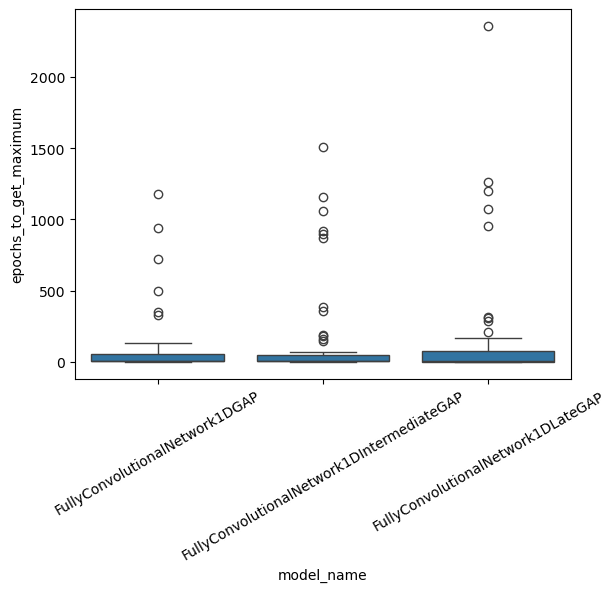

In [25]:
sns.boxplot(
    data=agg_model_execution_info.loc[
    (agg_model_execution_info['model_name'].isin(['FullyConvolutionalNetwork1DGAP', 'FullyConvolutionalNetwork1DIntermediateGAP', 'FullyConvolutionalNetwork1DLateGAP'])) & 
    # (agg_model_execution_info['dataset_name'].isin(['standwalkjump', 'atrialfibrillation']))
    True
],
    x = 'model_name',
    y = 'epochs_to_get_maximum'
)

plt.xticks(rotation = 30)
# plt.ylim([-50, 500])

In [26]:
params_comp_results = agg_model_execution_info.loc[
    (agg_model_execution_info['model_name'].isin(['InceptionTime', 'InceptionTimeIntermediate', 'InceptionTimeLate'])) & 
    # (agg_model_execution_info['dataset_name'].isin(['standwalkjump', 'atrialfibrillation'])) &
    True
]
params_comp_results = params_comp_results.groupby(['model_name']).agg({
    'model_params': 'std',
    'epochs_to_get_maximum': 'std',
    'traning_time': 'std',
    'test_accuracy': 'std'
}).reset_index()

params_comp_results

,model_name,model_params,epochs_to_get_maximum,traning_time,test_accuracy
0,InceptionTime,1.111608e+03,273.337564,1480.185200,0.137356
1,InceptionTimeIntermediate,6.687665e+05,291.593135,2649.924123,0.131765
2,InceptionTimeLate,1.311386e+06,320.418597,3727.389765,0.136636


In [27]:
params_comp_results = agg_model_execution_info.loc[
    (agg_model_execution_info['model_name'].isin(['InceptionTime', 'InceptionTimeIntermediate', 'InceptionTimeLate'])) & 
    # (agg_model_execution_info['dataset_name'].isin(['standwalkjump', 'atrialfibrillation'])) &
    True
]
params_comp_results = params_comp_results.groupby(['model_name']).agg({
    'model_params': 'mean',
    'epochs_to_get_maximum': 'median',
    'traning_time': 'median',
    'test_accuracy': 'median'
}).reset_index()

params_comp_results

,model_name,model_params,epochs_to_get_maximum,traning_time,test_accuracy
0,InceptionTime,6.344036e+05,111.0,1723.397748,0.954783
1,InceptionTimeIntermediate,1.307455e+06,97.2,2483.327983,0.954783
2,InceptionTimeLate,2.023597e+06,85.9,2286.731446,0.947684


In [28]:
params_comp_results = agg_model_execution_info.loc[
    (agg_model_execution_info['model_name'].isin(['InceptionTime', 'InceptionTimeIntermediate', 'InceptionTimeLate'])) & 
    # (agg_model_execution_info['dataset_name'].isin(['standwalkjump', 'atrialfibrillation'])) &
    True
]
params_comp_results = params_comp_results.groupby(['model_name']).agg({
    'model_params': 'mean',
    'epochs_to_get_maximum': 'mean',
    'traning_time': 'mean',
    'test_accuracy': 'mean'
}).reset_index()

params_comp_results

,model_name,model_params,epochs_to_get_maximum,traning_time,test_accuracy
0,InceptionTime,6.344036e+05,206.671429,1624.607165,0.890866
1,InceptionTimeIntermediate,1.307455e+06,220.334286,3035.910471,0.892336
2,InceptionTimeLate,2.023597e+06,201.931429,3610.191912,0.884939


([0, 1, 2],
 [Text(0, 0, 'InceptionTime'),
  Text(1, 0, 'InceptionTimeIntermediate'),
  Text(2, 0, 'InceptionTimeLate')])

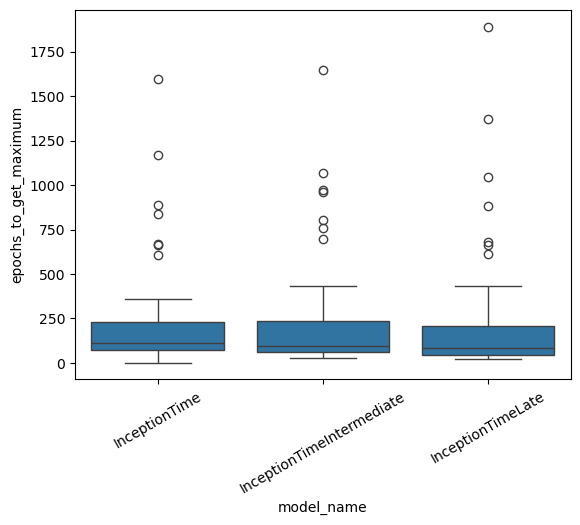

In [29]:
sns.boxplot(
    data=agg_model_execution_info.loc[
    (agg_model_execution_info['model_name'].isin(['InceptionTime', 'InceptionTimeIntermediate', 'InceptionTimeLate'])) & 
    # (agg_model_execution_info['dataset_name'].isin(['standwalkjump', 'atrialfibrillation']))
    True
],
    x = 'model_name',
    y = 'epochs_to_get_maximum'
)

plt.xticks(rotation = 30)
# plt.ylim([-50, 500])

In [30]:
params_comp_results = agg_model_execution_info.loc[
    (agg_model_execution_info['model_name'].isin(['LITE', 'LITEIntermediate', 'LITELate'])) & 
    (agg_model_execution_info['dataset_name'].isin(['standwalkjump', 'atrialfibrillation'])) &
    True
]
params_comp_results = params_comp_results.groupby(['model_name']).agg({
    'model_params': 'std',
    'epochs_to_get_maximum': 'std',
    'traning_time': 'std',
    'test_accuracy': 'std'
}).reset_index()

params_comp_results

,model_name,model_params,epochs_to_get_maximum,traning_time,test_accuracy
0,LITE,2298.191509,56.663312,5.908725,0.102184
1,LITEIntermediate,8523.828149,47.650167,77.878001,0.105118
2,LITELate,10066.899591,44.078538,61.065887,0.085771


In [31]:
params_comp_results = agg_model_execution_info.loc[
    (agg_model_execution_info['model_name'].isin(['LITE', 'LITEIntermediate', 'LITELate'])) & 
    (agg_model_execution_info['dataset_name'].isin(['standwalkjump', 'atrialfibrillation'])) &
    True
]
params_comp_results = params_comp_results.groupby(['model_name']).agg({
    'model_params': 'mean',
    'epochs_to_get_maximum': 'median',
    'traning_time': 'median',
    'test_accuracy': 'median'
}).reset_index()

params_comp_results

,model_name,model_params,epochs_to_get_maximum,traning_time,test_accuracy
0,LITE,14295.0,27.5,85.358588,0.466667
1,LITEIntermediate,26431.0,42.0,202.503969,0.533333
2,LITELate,29439.0,48.8,191.534840,0.533333


In [32]:
params_comp_results = agg_model_execution_info.loc[
    (agg_model_execution_info['model_name'].isin(['LITE', 'LITEIntermediate', 'LITELate'])) & 
    (agg_model_execution_info['dataset_name'].isin(['standwalkjump', 'atrialfibrillation'])) &
    True
]
params_comp_results = params_comp_results.groupby(['model_name']).agg({
    'model_params': 'mean',
    'epochs_to_get_maximum': 'mean',
    'traning_time': 'mean',
    'test_accuracy': 'mean'
}).reset_index()

params_comp_results

,model_name,model_params,epochs_to_get_maximum,traning_time,test_accuracy
0,LITE,14295.0,47.24,83.87604,0.471667
1,LITEIntermediate,26431.0,56.05,200.63348,0.535000
2,LITELate,29439.0,59.82,189.18512,0.536667


([0, 1, 2],
 [Text(0, 0, 'LITE'), Text(1, 0, 'LITEIntermediate'), Text(2, 0, 'LITELate')])

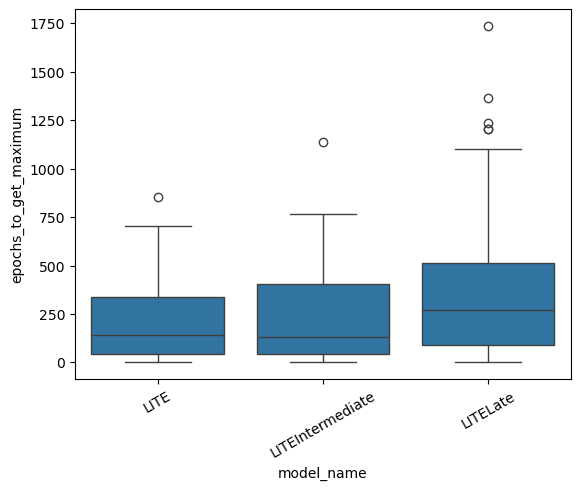

In [33]:
sns.boxplot(
    data=agg_model_execution_info.loc[
    (agg_model_execution_info['model_name'].isin(['LITE', 'LITEIntermediate', 'LITELate'])) & 
    # (agg_model_execution_info['dataset_name'].isin(['standwalkjump', 'atrialfibrillation']))
    True
],
    x = 'model_name',
    y = 'epochs_to_get_maximum'
)

plt.xticks(rotation = 30)
# plt.ylim([-50, 500])

<Axes: xlabel='test_accuracy', ylabel='traning_time'>

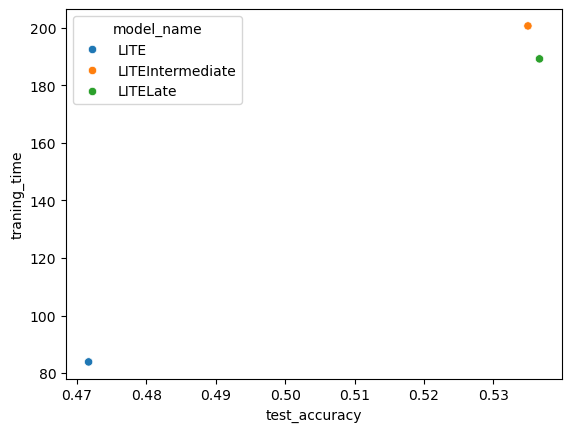

In [34]:
sns.scatterplot(
    data = params_comp_results,
    x = 'test_accuracy',
    y = 'traning_time',
    hue = 'model_name'
)

In [35]:
from visualization.critical_diagram import draw_cd_diagram

In [36]:
critical_diagram_data = complete_data.groupby(['model_name', 'dataset'])['max_test_accuracy'].mean().reset_index().rename({
    'model_name': 'classifier_name',
    'dataset': 'dataset_name',
    'max_test_accuracy': 'accuracy'

}, axis = 1)

In [37]:
used_classifiers = [
    'MultiLayerPerceptron',
    'FullyConvolutionalNetwork1D',
    'FullyConvolutionalNetwork1DIntermediate',
    'FullyConvolutionalNetwork1DLate',
    'InceptionTime',
    'InceptionTimeLate',
    'InceptionTimeIntermediate',
    'LITE',
    'LITEIntermediate',
    'LITELate'
]

In [38]:
used_df = critical_diagram_data.loc[critical_diagram_data.classifier_name.isin(used_classifiers)].query("dataset_name != 'eigenworms'")
# used_df

In [39]:
metrics_df = pd.pivot_table(
    used_df.query("dataset_name != 'eigenworms'"),
    index = 'dataset_name',
    columns = 'classifier_name',
    values = 'accuracy'
)

In [40]:
metrics_df

classifier_name,InceptionTime,LITE
dataset_name,,
daily_and_sports_activities,0.924386,0.945526
wear_inertial,NaN,0.066473


In [41]:
from labicompare.visualization import one_vs_one_plot

one_vs_one_plot(
    metrics_df['LITEIntermediate'].values,
    metrics_df['LITE'].values,
    'LITE Int.', 'LITE'
)

one_vs_one_plot(
    metrics_df['LITELate'].values,
    metrics_df['LITE'].values,
    'LITE Late', 'LITE'
)


KeyError: 'LITEIntermediate'

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'One vs One Comparison: Inception Late vs Inception'}, xlabel='Inception Late performance', ylabel='Inception performance'>)

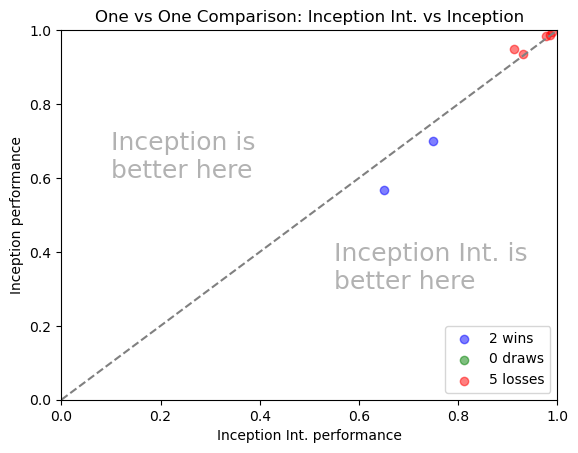

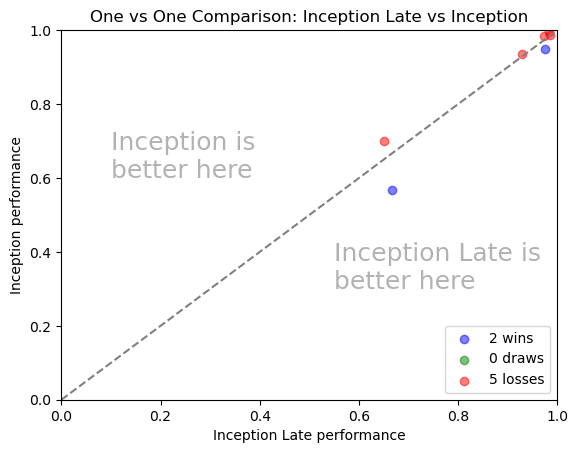

In [42]:
from labicompare.visualization import one_vs_one_plot

one_vs_one_plot(
    metrics_df['InceptionTimeIntermediate'].values,
    metrics_df['InceptionTime'].values,
    'Inception Int.', 'Inception'
)

from labicompare.visualization import one_vs_one_plot

one_vs_one_plot(
    metrics_df['InceptionTimeLate'].values,
    metrics_df['InceptionTime'].values,
    'Inception Late', 'Inception'
)


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'One vs One Comparison: FCN Late vs FCN'}, xlabel='FCN Late performance', ylabel='FCN performance'>)

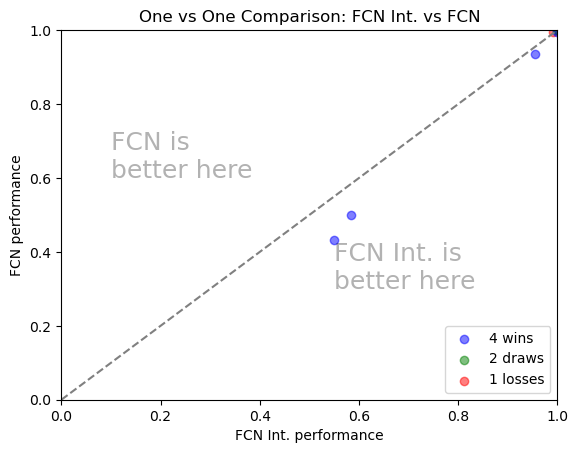

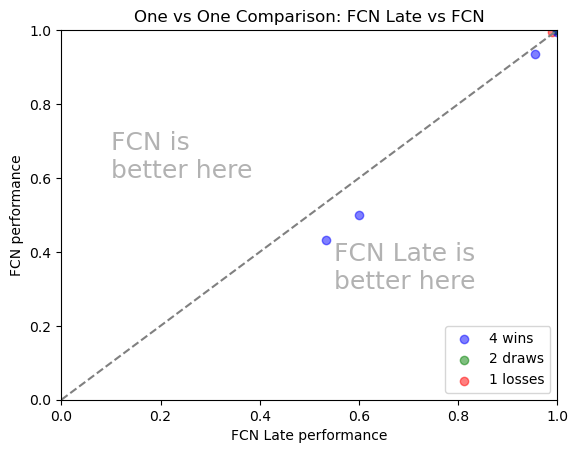

In [43]:
from labicompare.visualization import one_vs_one_plot

one_vs_one_plot(
    metrics_df['FullyConvolutionalNetwork1DIntermediate'].values,
    metrics_df['FullyConvolutionalNetwork1D'].values,
    'FCN Int.', 'FCN'
)

from labicompare.visualization import one_vs_one_plot

one_vs_one_plot(
    metrics_df['FullyConvolutionalNetwork1DLate'].values,
    metrics_df['FullyConvolutionalNetwork1D'].values,
    'FCN Late', 'FCN'
)


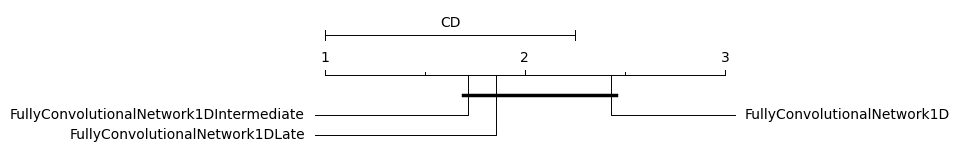

In [44]:
from labicompare.visualization import critical_difference_diagram

fig = critical_difference_diagram(
    metrics=metrics_df.loc[:, ['FullyConvolutionalNetwork1D', 'FullyConvolutionalNetwork1DIntermediate', 'FullyConvolutionalNetwork1DLate']],
    test='nemenyi',
    alpha=0.05
)

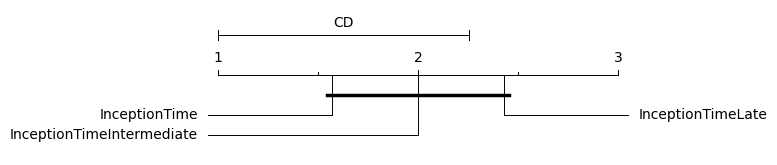

In [45]:
from labicompare.visualization import critical_difference_diagram

fig = critical_difference_diagram(
    metrics=metrics_df.loc[:, ['InceptionTime', 'InceptionTimeIntermediate', 'InceptionTimeLate']],
    test='nemenyi',
    alpha=0.05
)

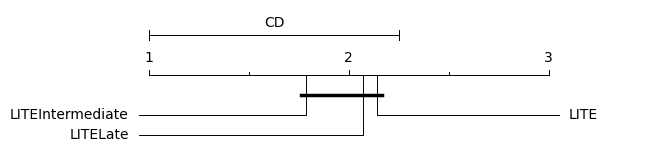

In [46]:
from labicompare.visualization import critical_difference_diagram

fig = critical_difference_diagram(
    metrics=metrics_df.loc[: , ['LITE', 'LITEIntermediate', 'LITELate']],
    test='nemenyi',
    alpha=0.05
)

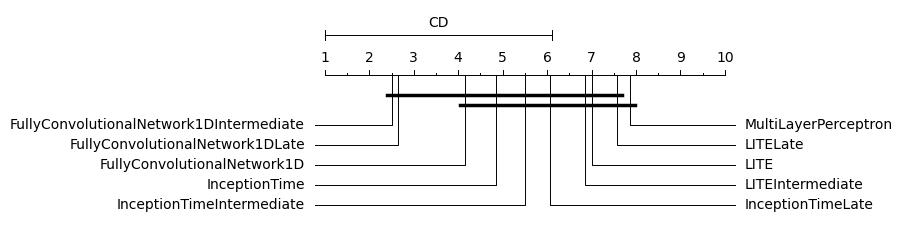

In [47]:
from labicompare.visualization import critical_difference_diagram

fig = critical_difference_diagram(
    metrics=metrics_df,
    test='nemenyi',
    alpha=0.05
)

['FullyConvolutionalNetwork1D' 'FullyConvolutionalNetwork1DIntermediate'
 'FullyConvolutionalNetwork1DLate' 'InceptionTime'
 'InceptionTimeIntermediate' 'InceptionTimeLate' 'LITE' 'LITEIntermediate'
 'LITELate' 'MultiLayerPerceptron']
FullyConvolutionalNetwork1D                1.0
FullyConvolutionalNetwork1DIntermediate    0.0
FullyConvolutionalNetwork1DLate            0.0
InceptionTime                              0.0
InceptionTimeIntermediate                  1.0
InceptionTimeLate                          1.0
LITE                                       0.0
LITEIntermediate                           0.0
LITELate                                   0.0
MultiLayerPerceptron                       0.0
dtype: float64
MultiLayerPerceptron                       7.857143
LITELate                                   7.571429
LITE                                       7.000000
LITEIntermediate                           6.857143
InceptionTimeLate                          6.071429
InceptionTimeInterme

/home/stbastos/yes/envs/pytorch_enviroment/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  res = hypotest_fun_out(*samples, **kwds)
/home/stbastos/yes/envs/pytorch_enviroment/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: Sample size too small for normal approximation.
  res = hypotest_fun_out(*samples, **kwds)


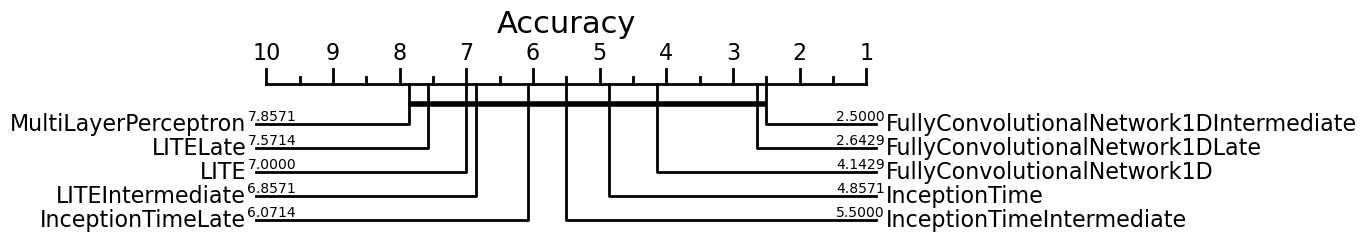

<Figure size 640x480 with 0 Axes>

In [48]:
result = draw_cd_diagram(
    # df_perf=critical_diagram_data.query("dataset_name != 'eigenworms'"), 
    df_perf=used_df, 
    # df_perf=critical_diagram_data.loc[critical_diagram_data.classifier_name.apply(lambda x: True if 'Fully' in x else False)], 
    title='Accuracy', 
    labels=True, 
    alpha=0.05
)

# plt.imshow('/home/stbastos/experiments/multimodal_time_series_classification/cd-diagram.png')


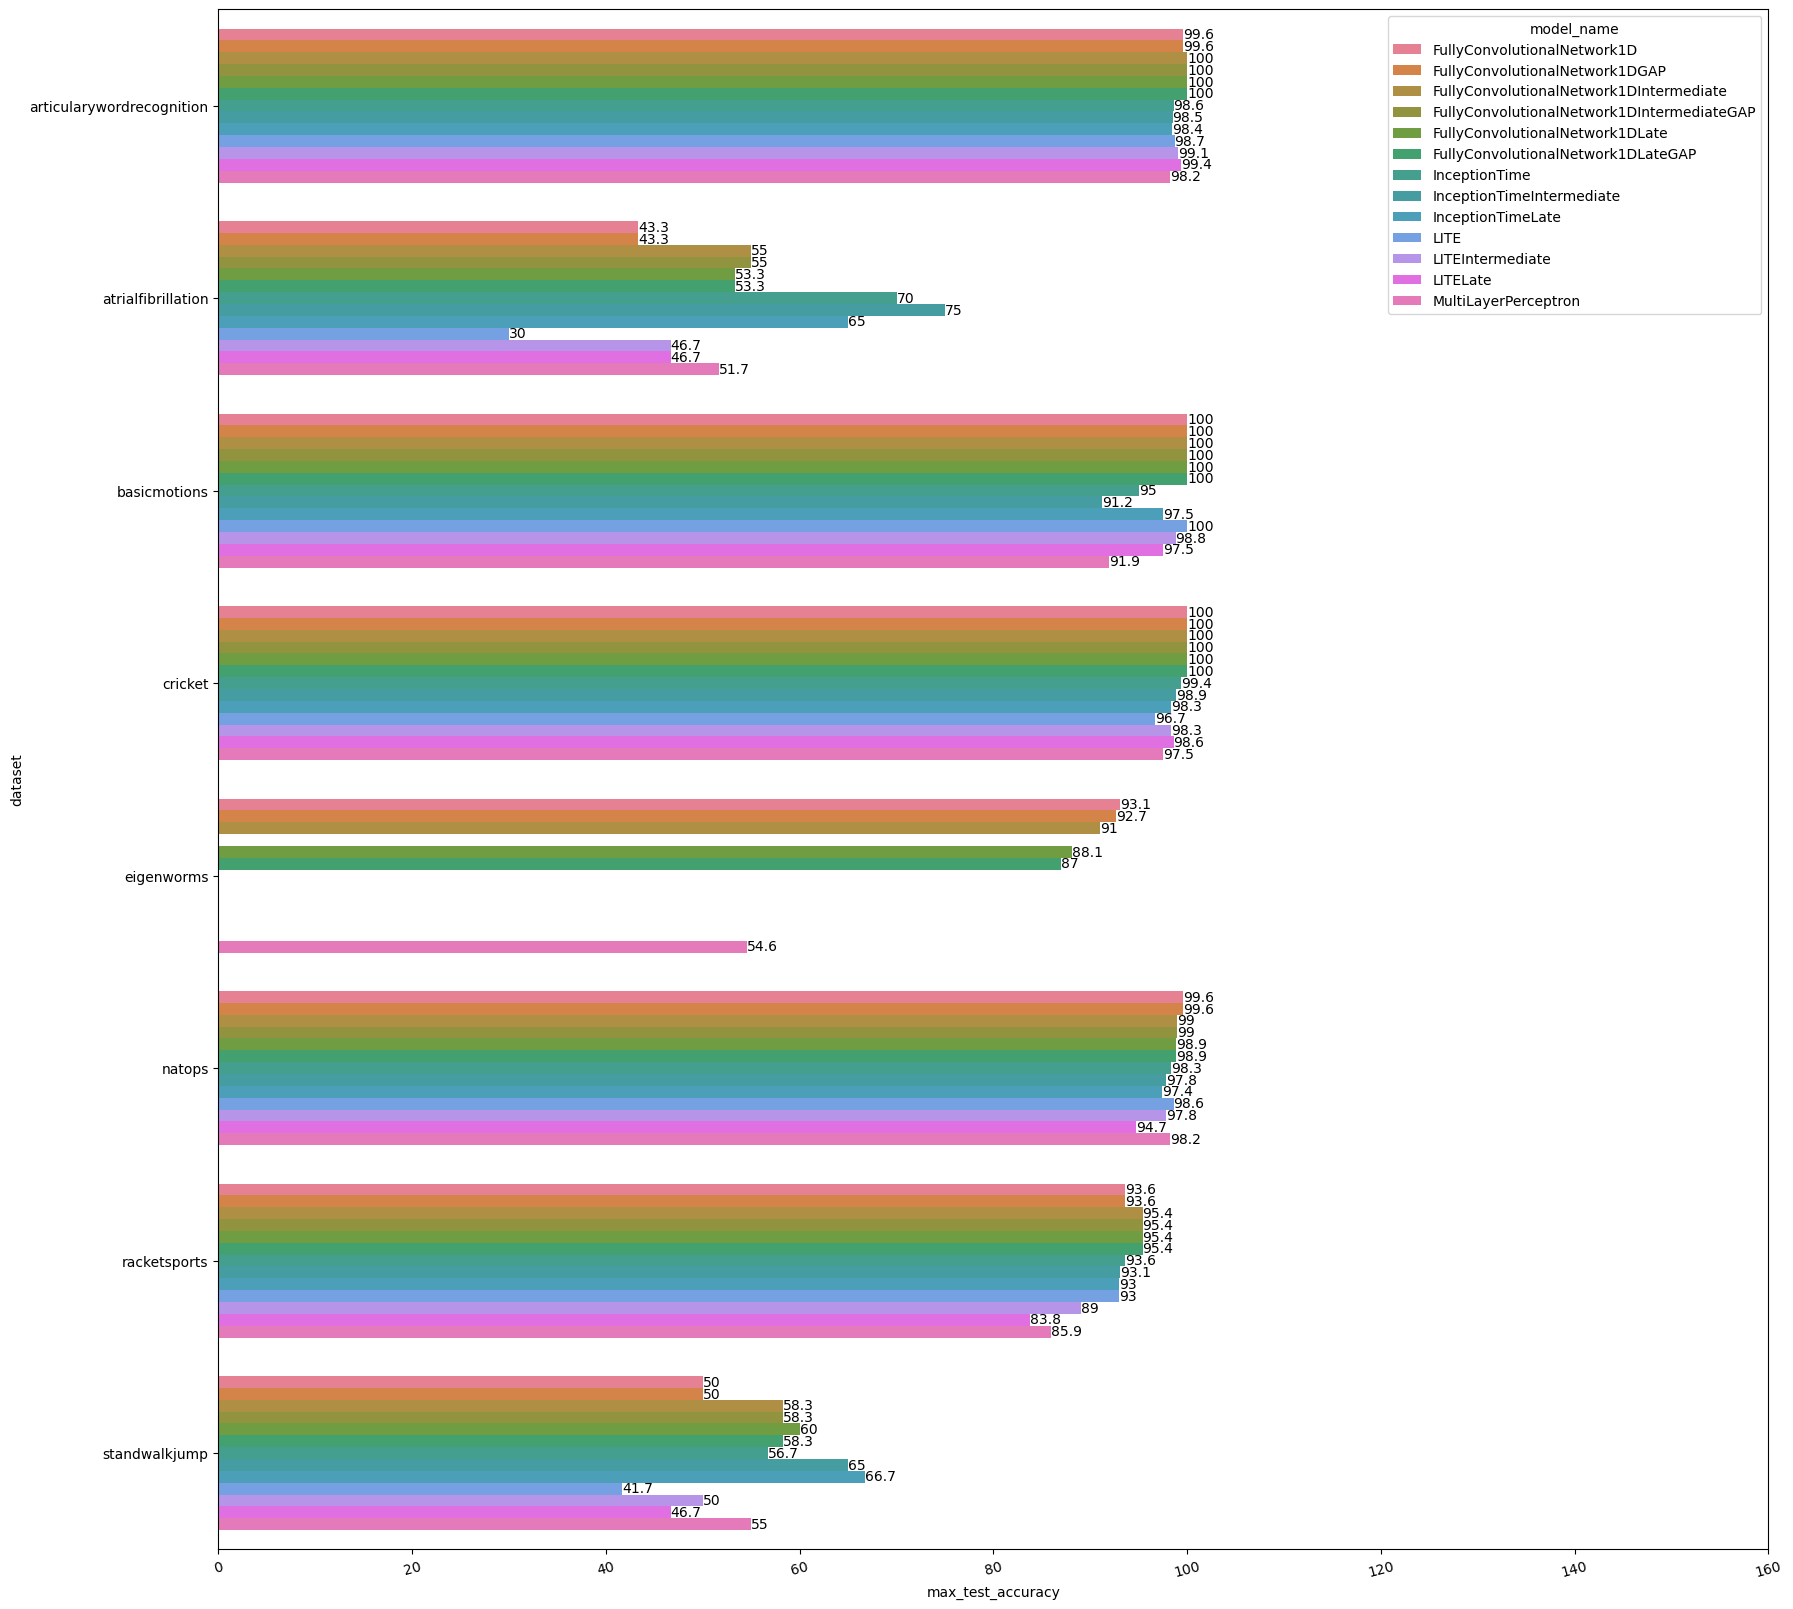

In [49]:
plt.figure(figsize = (20,20))
ax = sns.barplot(
    data = agg_results_data, #.query("model_name != 'InceptionTime'"), 
    y = 'dataset', 
    x = 100*agg_results_data['max_test_accuracy'].apply(lambda x: round(x, 3)), 
    hue = 'model_name'
)

for i in ax.containers:
    ax.bar_label(i,)

plt.xticks(rotation = 15)
plt.xlim([0, 100*1.6])
plt.show()

In [50]:
ds_object = datasets.load_classification(
                        name='ACSF1',
                        return_metadata=True
                    )


with open(f'./downloaded_datasets/ACSF1.pkl', 'wb') as f:  # open a text file
    pickle.dump(ds_object, f)